<a href="https://colab.research.google.com/github/alexkardan/Data110/blob/main/Week_10_HW_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving Daily_Arrests_20241113.csv to Daily_Arrests_20241113.csv


In [6]:
df = pd.read_csv("Daily_Arrests_20241113.csv")


In [7]:
# Filter rows where 'OFFENSE' column contains the word "theft"
theft_df = df[df['OFFENSE'].str.contains("theft", case=False, na=False)]

# Preview the filtered dataset
theft_df.head()


,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
10,VELAZQUEZ,ANDERSON,DOMINGOS,20,12900 Block Of HATWAWAY DRIVE,SILVER SPRING,MD,11/07/2024,"THEFT: $25,000 TO UNDER $100,000"
14,GREENE,MICHAEL,ANTHONY,30,11700 Block Of TROPHY COURT,GERMANTOWN,MD,11/07/2024,"CON-THEFT: $100 TO UNDER $1,500"
27,VASQUEZ LINARES,ABNER,NaN,26,12100 Block Of BLUE HILL RD,SILVER SPRING,MD,11/07/2024,"THEFT: $1,500 TO UNDER $25,000"
30,HARPER,KHARI,XAVIER,32,14400 Block Of BELL PRE RD,SILVER SPRING,MD,11/08/2024,"THEFT: $1,500 TO UNDER $25,000"
31,ROSALES,HERSON,DAVID,34,13200 Block Of Danphine St,SILVER SPRING,MD,11/08/2024,"THEFT: $1,500 TO UNDER $25,000"


In [8]:
total_thefts = theft_df.shape[0]
print("Total number of theft incidents:", total_thefts)


Total number of theft incidents: 76


In [9]:
age_min = theft_df['AGE'].min()
age_max = theft_df['AGE'].max()
print(f"Age range involved in theft offenses: {age_min} to {age_max}")


Age range involved in theft offenses: 18 to 69


<ipython-input-17-791a218bcc20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])
<ipython-input-17-791a218bcc20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['DAY_OF_WEEK'] = theft_df['ARREST DATE'].dt.day_name()


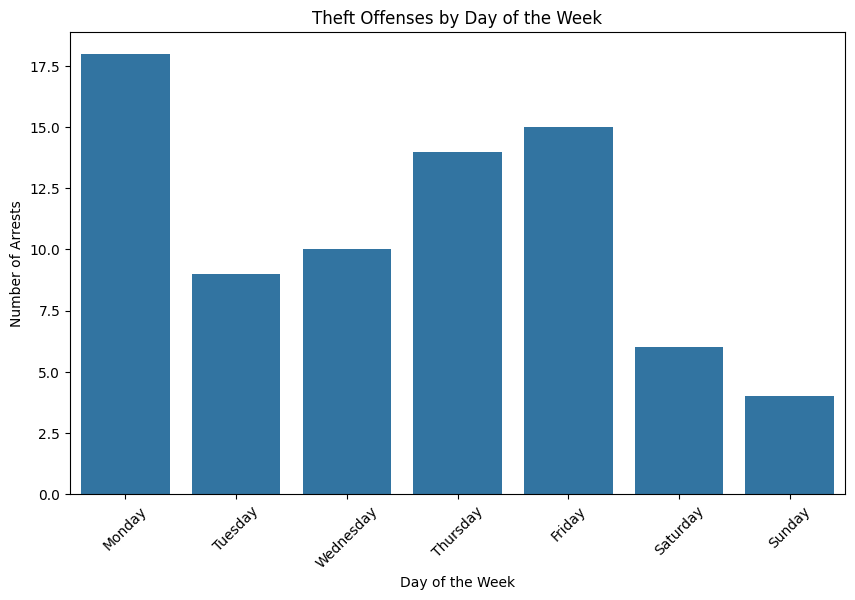

In [17]:

theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])

# Extract day of the week
theft_df['DAY_OF_WEEK'] = theft_df['ARREST DATE'].dt.day_name()

# Plot the number of thefts by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=theft_df, x='DAY_OF_WEEK', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Theft Offenses by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45)
plt.show()


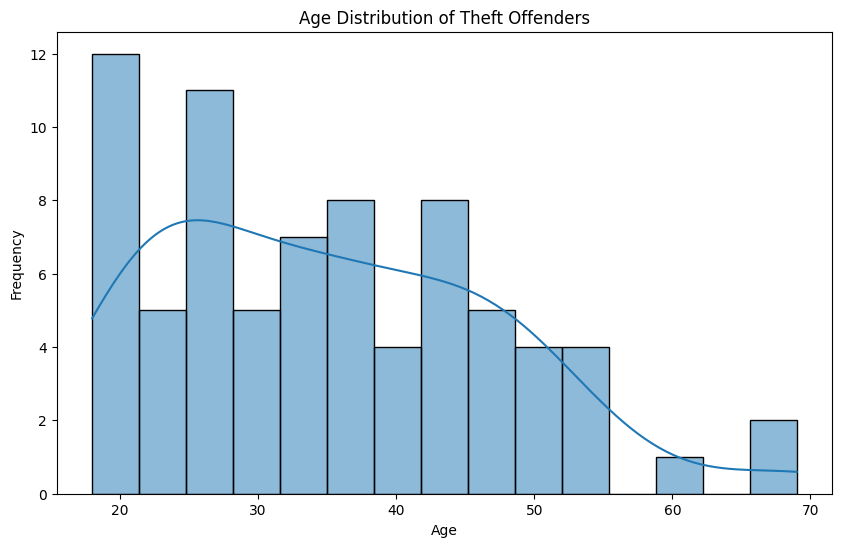

In [11]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(theft_df['AGE'], bins=15, kde=True)
plt.title("Age Distribution of Theft Offenders")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


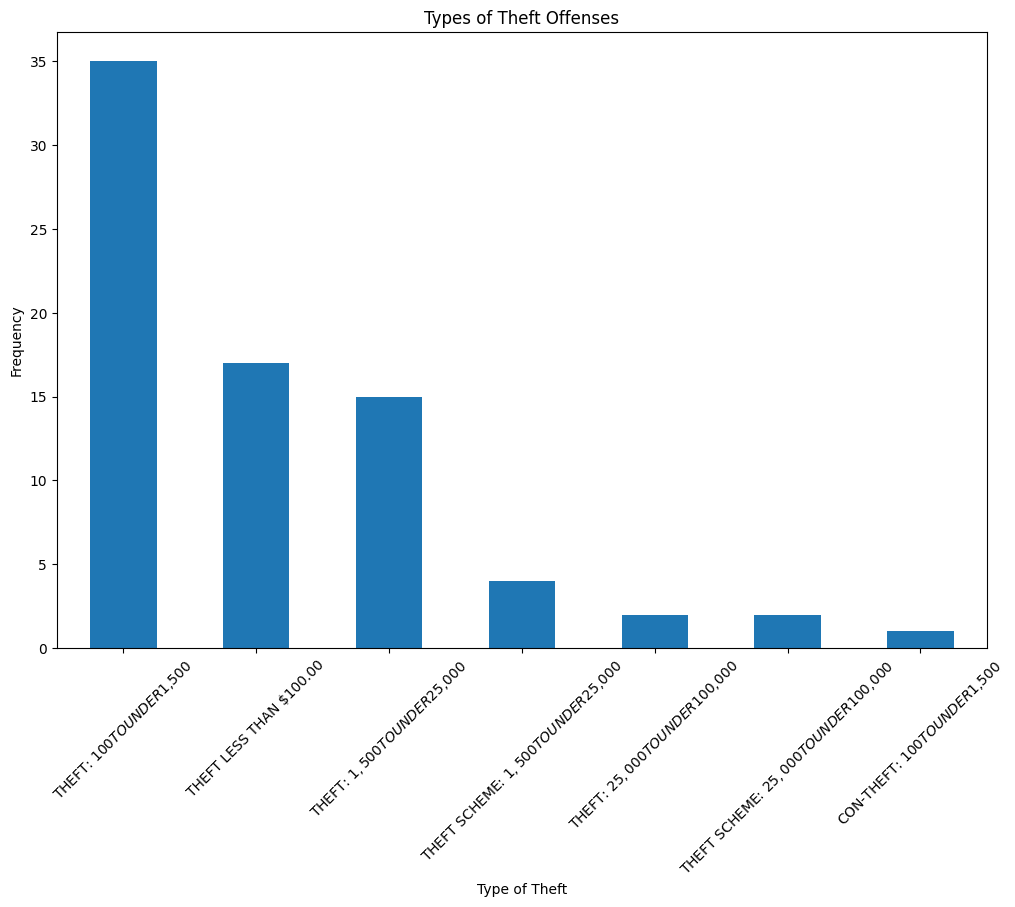

In [12]:
# Types of theft offenses
theft_types = theft_df['OFFENSE'].value_counts()

# The types of theft offenses
plt.figure(figsize=(12, 8))
theft_types.plot(kind='bar')
plt.title("Types of Theft Offenses")
plt.xlabel("Type of Theft")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
